<a href="https://colab.research.google.com/github/shanjoy21/shanjoy/blob/main/House_price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('train.csv')

Saving train.csv to train.csv


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
!pip install category_encoders
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('train.csv') #removed extra read attribute
df.head ()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
df.nunique()

,0
date,70
price,1741
bedrooms,10
bathrooms,26
sqft_living,566
sqft_lot,3113
floors,6
waterfront,2
view,5
condition,5


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df.groupby('city')['price'].sum().sort_values()

,price
city,
Inglewood-Finn Hill,4.250000e+05
Snoqualmie Pass,5.250000e+05
Milton,5.700000e+05
Skykomish,6.990000e+05
Beaux Arts Village,7.450000e+05
Algona,1.036440e+06
Preston,1.124900e+06
Pacific,1.351400e+06
Black Diamond,3.056450e+06


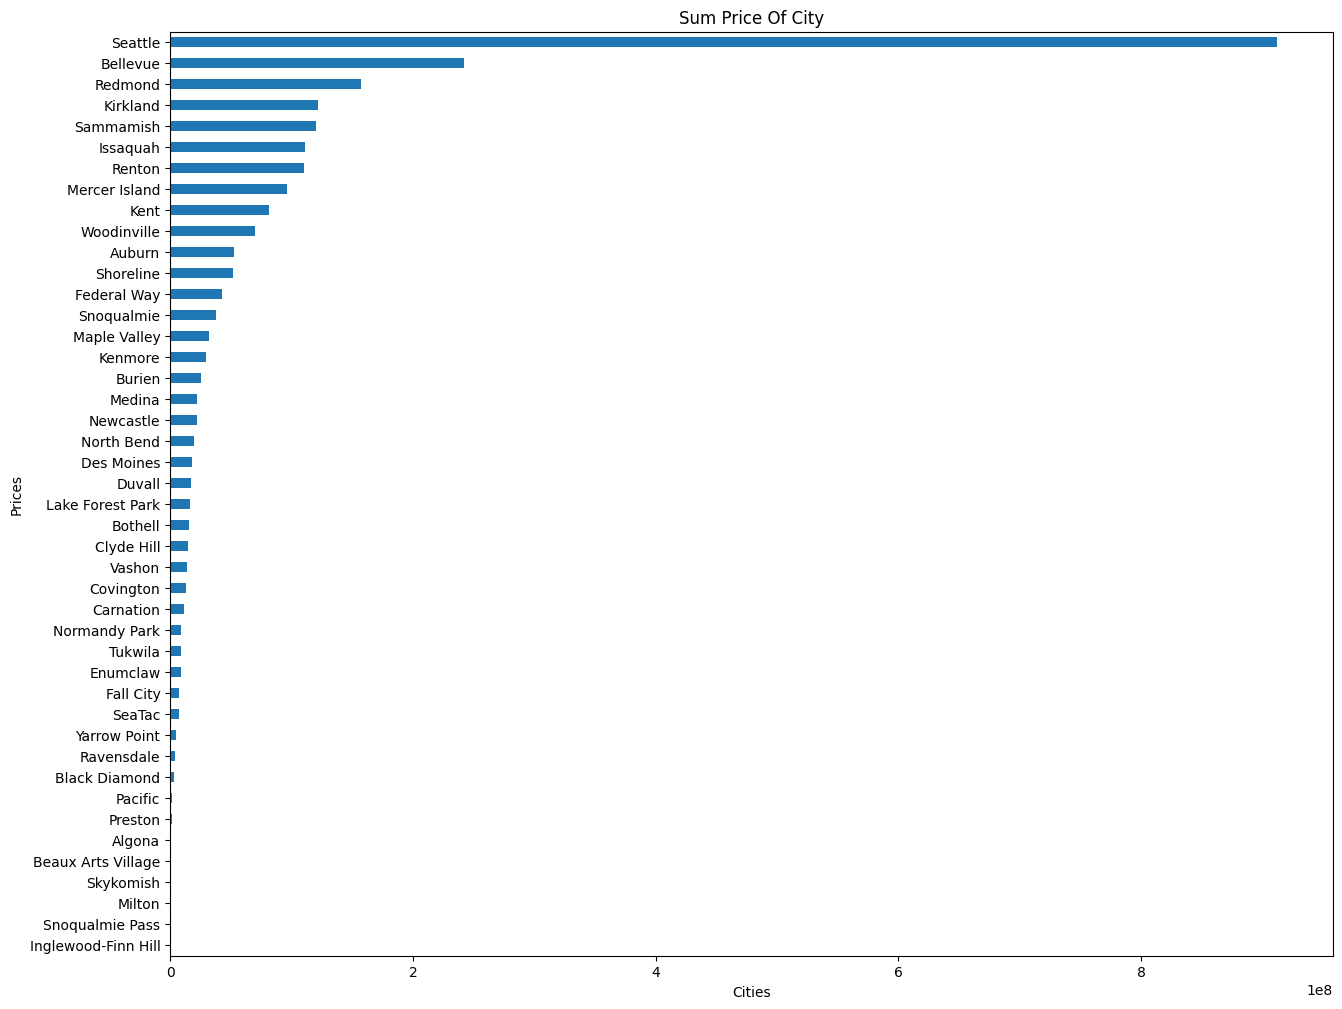

In [28]:
#any barchart must be sorted for a beautiful view
plt.figure(figsize=(15,12))
df.groupby('city')['price'].sum().rename('sum of price').sort_values().plot(kind="barh")
plt.title('Sum Price Of City')
plt.xlabel('Cities')
plt.ylabel('Prices')
plt.show()

In [29]:
df['city'].value_counts()

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Issaquah,187
Kirkland,187
Kent,185
Auburn,176
Sammamish,175


In [30]:
med_price = df.groupby('city')['price'].median().rename('Median Price').to_frame().reset_index().sort_values(ascending=False,by='Median Price')
med_price

,city,Median Price
22,Medina,2100000.0
43,Yarrow Point,1397000.0
8,Clyde Hill,1300000.0
23,Mercer Island,948750.0
2,Beaux Arts Village,745000.0
3,Bellevue,721500.0
33,Sammamish,665000.0
31,Redmond,638000.0
25,Newcastle,602500.0
13,Fall City,563500.0


In [31]:
import plotly.express as px

fig = px.bar(data_frame=med_price,
             y='city',
             x='Median Price',
             title='Median Prices by Cities',
             labels={'city': 'Cities', 'Median Price': 'Median Prices'},
             color='city',
             orientation='h'
            )

fig.show()

In [32]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [33]:
fig = px.scatter(data_frame=df,x='bathrooms',y="sqft_above",color='bathrooms',
                 title='Sqft_Above vs Bath Rooms',
                 labels={'bathrooms': 'Bath Rooms', 'sqft_above': 'Sqft_Above'})
fig.show()

In [34]:
df['country'].unique()

array(['USA'], dtype=object)

High and Low Cardinality

In [35]:
for column in df.select_dtypes('object'):
    print(f"column {column} has {df[column].nunique()}different unique values")

column street has 4525different unique values
column city has 44different unique values
column statezip has 77different unique values
column country has 1different unique values


In [36]:
df.drop(columns=['date', 'street', 'statezip', 'country'], axis = 1 , inplace=True)

In [38]:
df.shape

(4600, 14)

In [39]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [40]:
#select numerical columns
num_col = df.select_dtypes(exclude='object')
num_col


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [41]:
for column in num_col:
    print(column)

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
sqft_above
sqft_basement
yr_built
yr_renovated


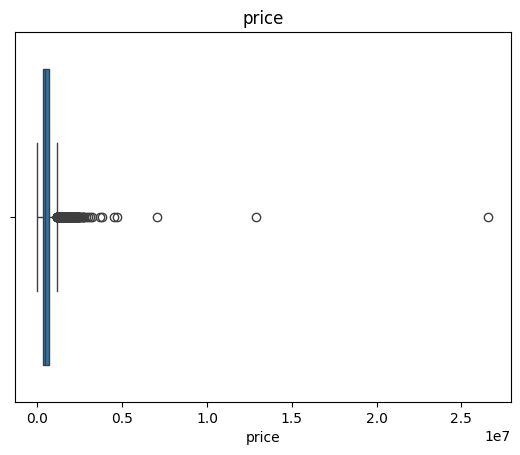

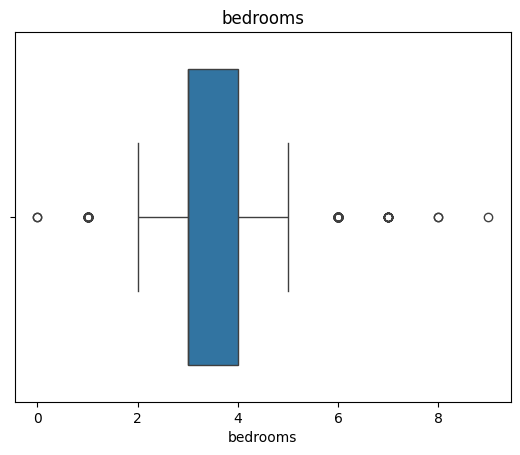

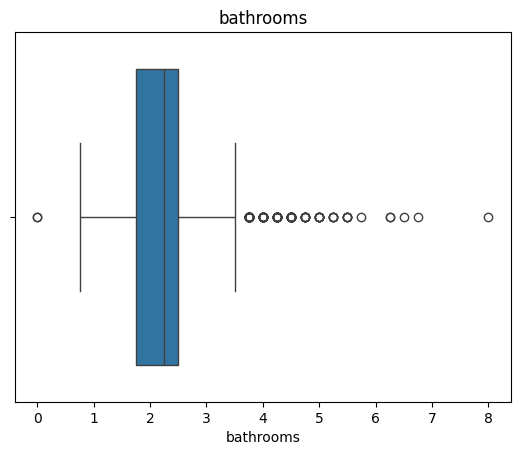

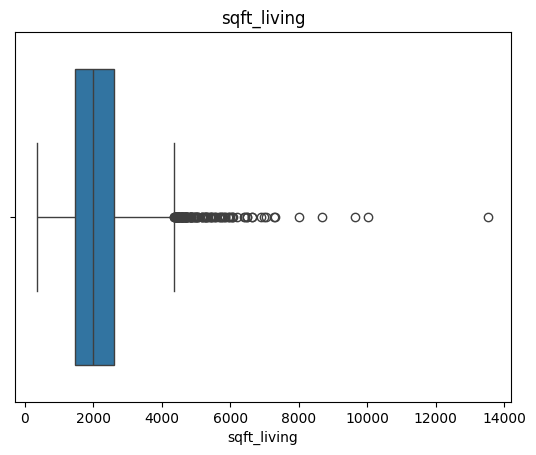

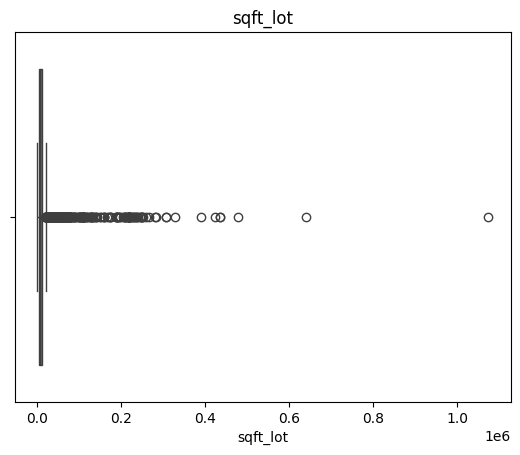

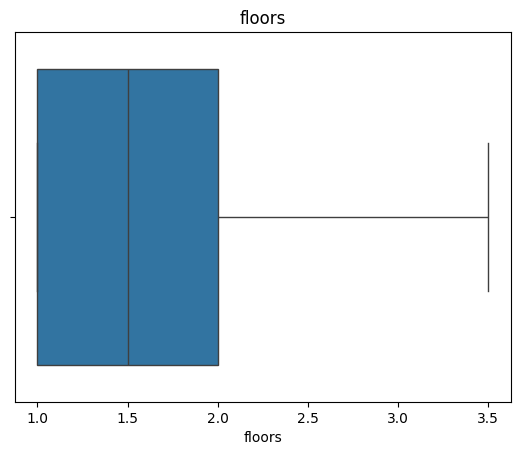

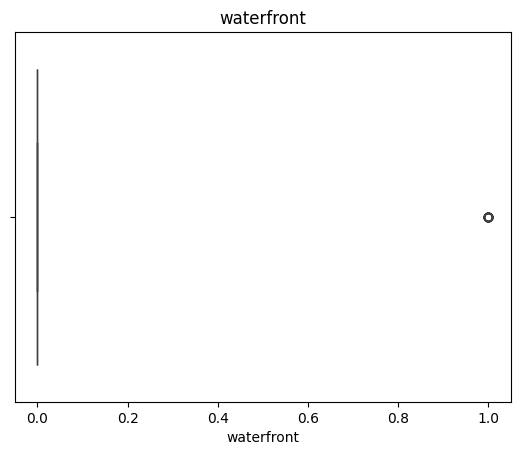

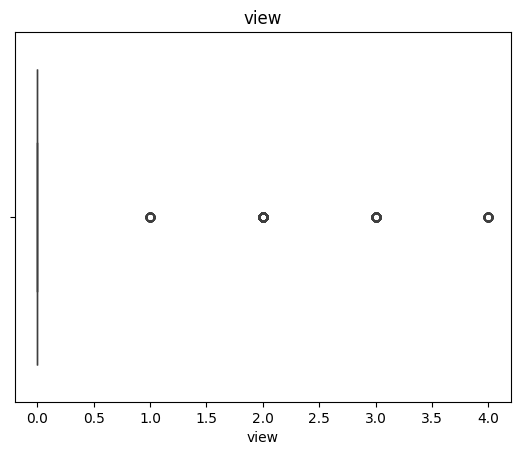

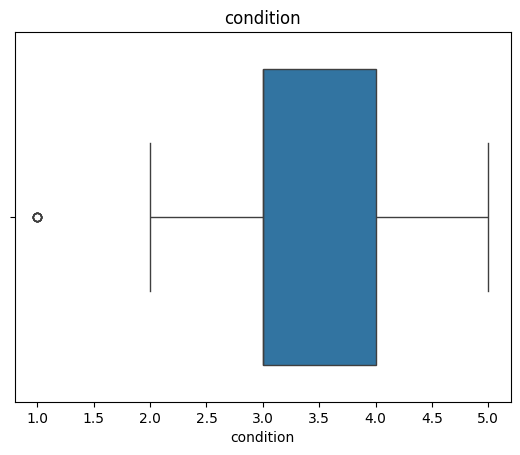

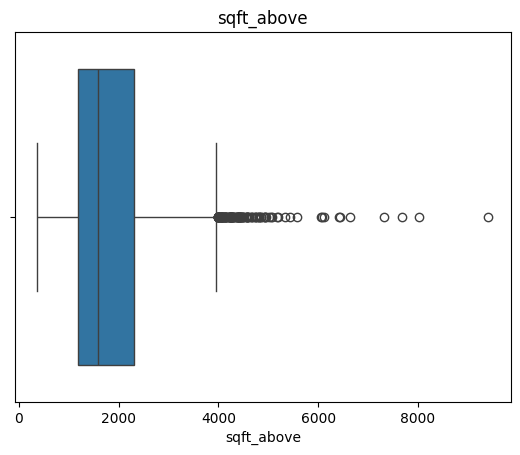

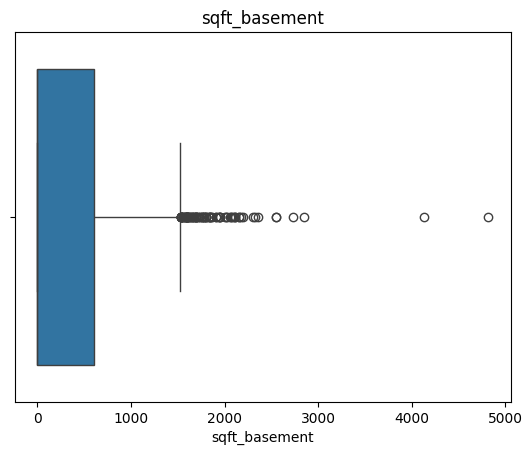

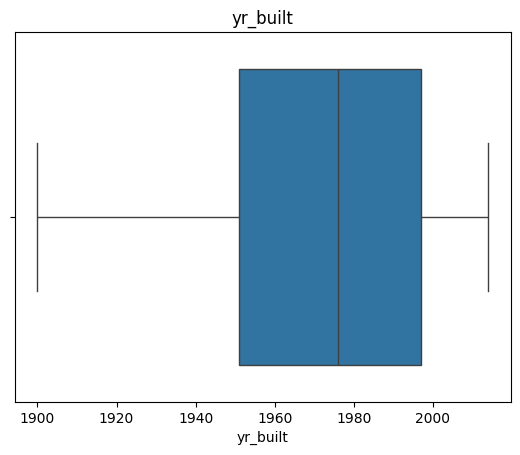

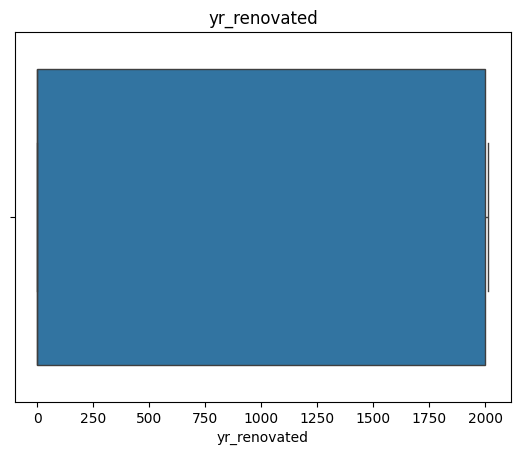

In [42]:
for column in num_col:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

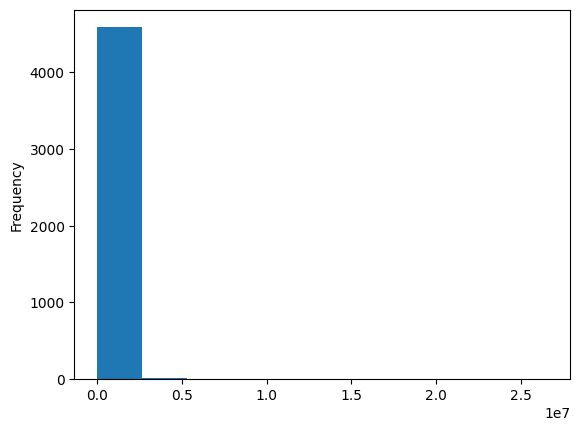

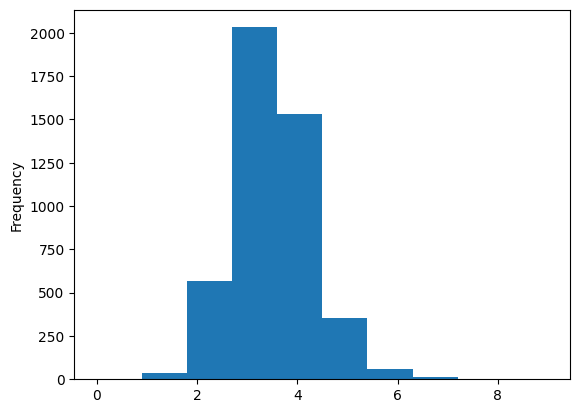

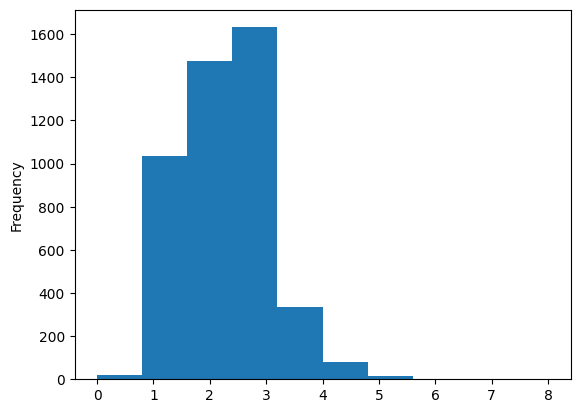

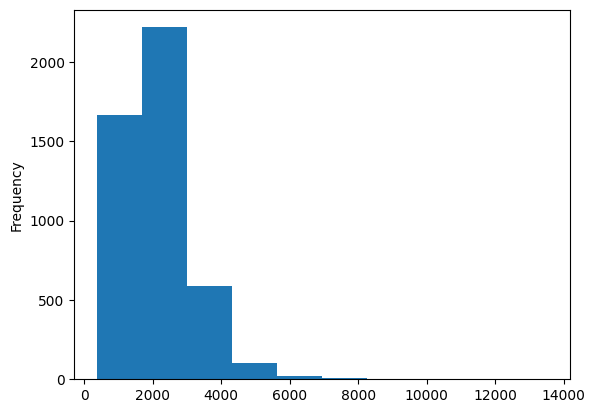

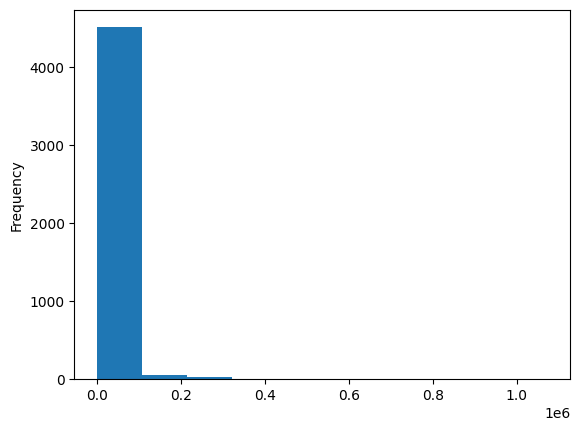

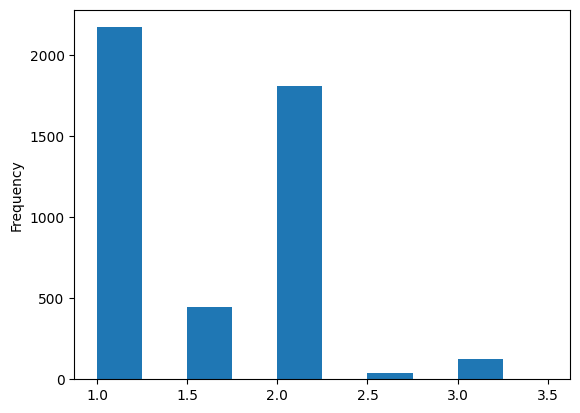

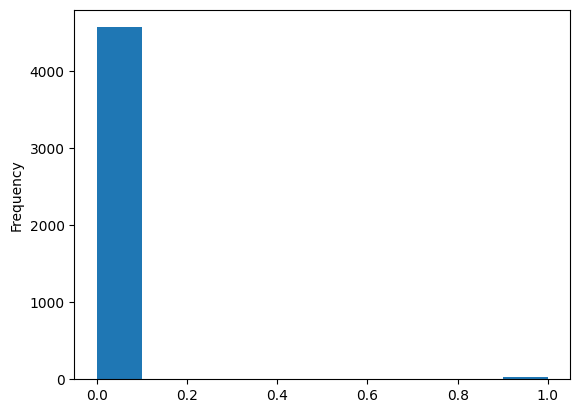

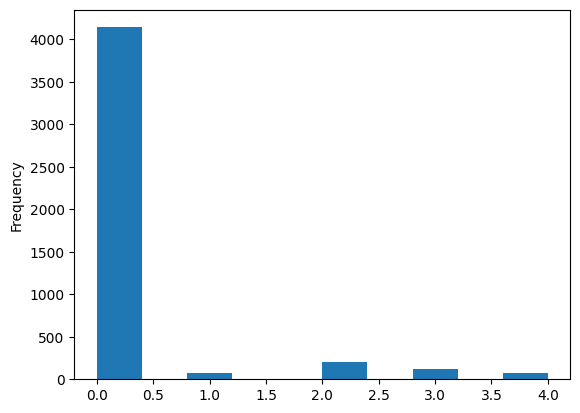

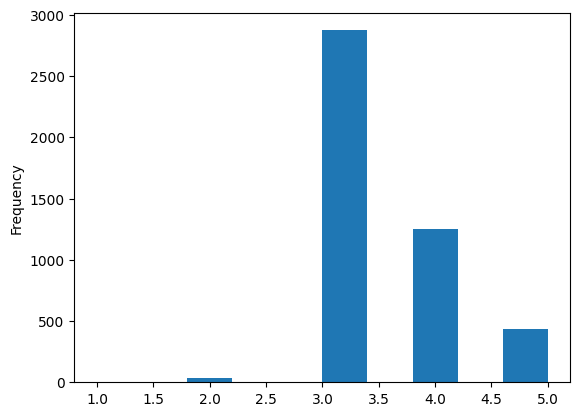

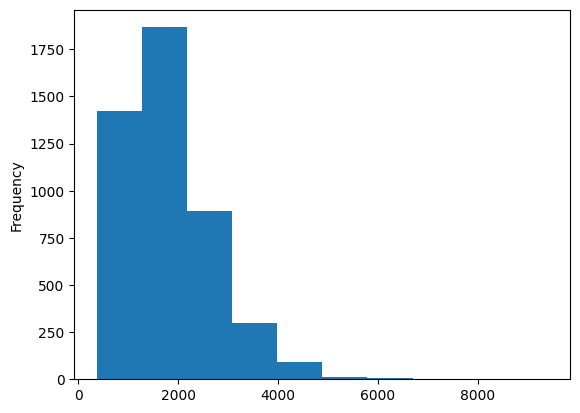

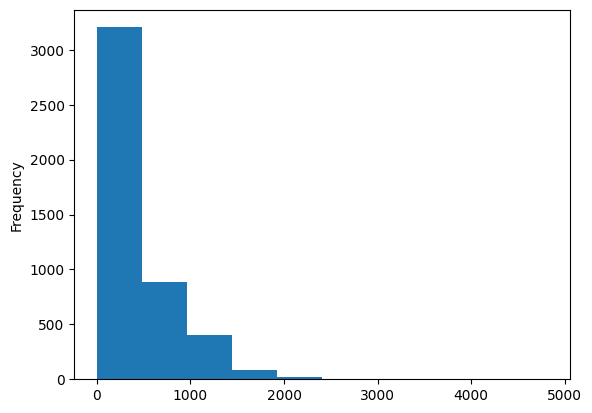

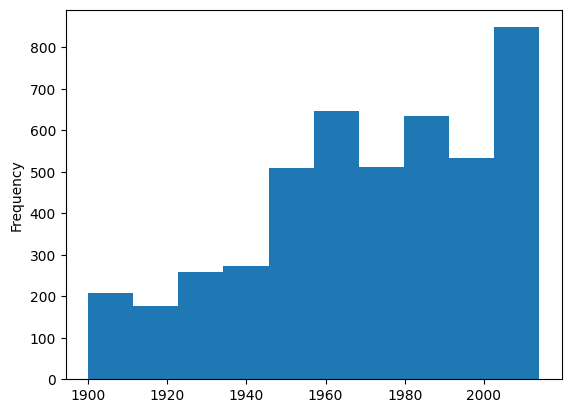

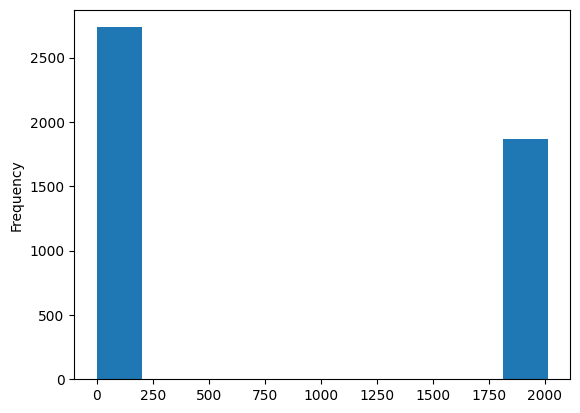

In [43]:
for i in num_col:
    df[i].plot(kind='hist')
    plt.show()

In [45]:
corr = num_col.corr() # Calculate the correlation matrix for numerical columns
corr # Display the correlation matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


Heat map

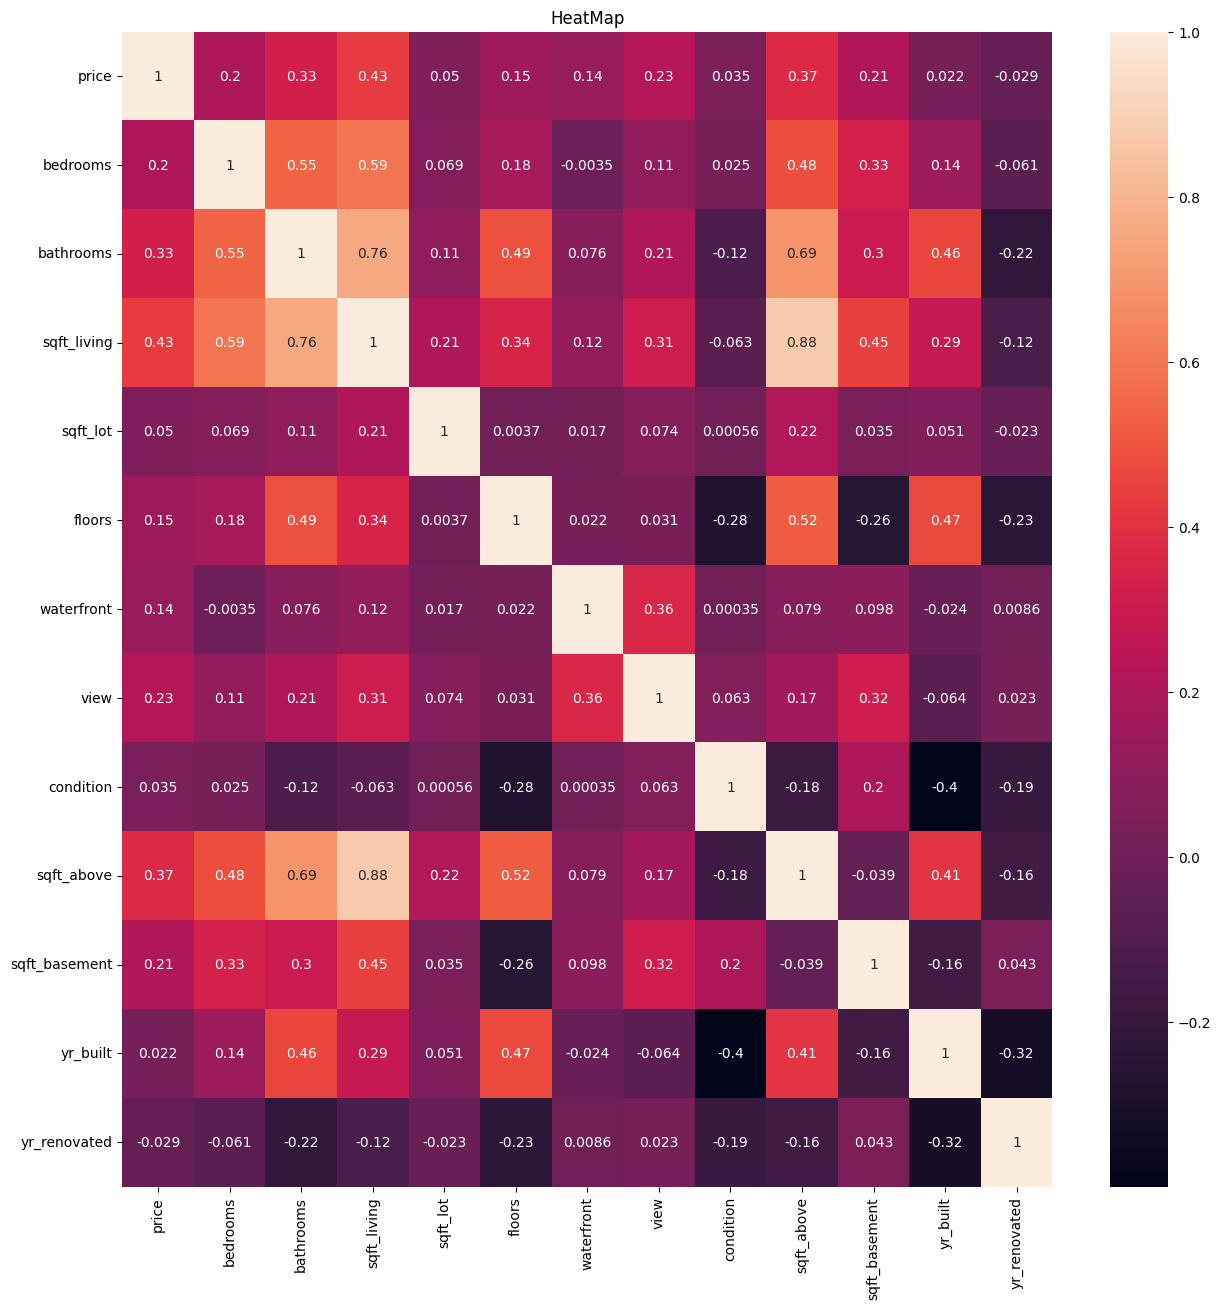

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True )
plt.title('HeatMap')
plt.show()

In [47]:
df['price'].corr(df['bathrooms'])

0.3271099182877354

In [48]:
df['price'].corr(df['sqft_living'])

0.43041002543262824

In [62]:
# At LinerRegression best model is OneHotEncoder
# (This line is a comment and doesn't have a syntax error, but it's not valid Python code.)
# You might want to use a string variable instead:
# best_model = "OneHotEncoder"
# print(f"At LinearRegression, the best model is {best_model}")

In [49]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [50]:
x =df.drop('price',axis = 1)
y = df['price']
print(f"xshape={x.shape}")
print(f"y shape={y.shape}")

xshape=(4600, 13)
y shape=(4600,)


In [52]:
!pip install scikit-learn # install the scikit-learn library that contains all necessary modules
from sklearn.pipeline import make_pipeline # import the make_pipeline function
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression

model = make_pipeline(
    OneHotEncoder(),
    MinMaxScaler(),
    LinearRegression()
)

In [57]:
!pip install scikit-learn # install the scikit-learn library that contains all necessary modules
from sklearn.pipeline import make_pipeline # import the make_pipeline function
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler # import MaxAbsScaler
from sklearn.linear_model import LinearRegression

model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'), # handles unknown values in unseen data
    MaxAbsScaler(), # Use MaxAbsScaler instead of MinMaxScaler for sparse data
    LinearRegression()
)

In [59]:
# Fit the model to the data before making predictions
model.fit(x,y)

# Now you can predict
y_pred = model.predict(x)

In [60]:
round(mean_absolute_error(y , y_pred),2)

21610.66